##FYP Simulation Work:
**In this Work we will use Open Pose Library along with the proposed algorithm to carry out our objectives in an efficient manner.**

**Initialization:**
Initially import a sample video from youtube on which result is to be performed.


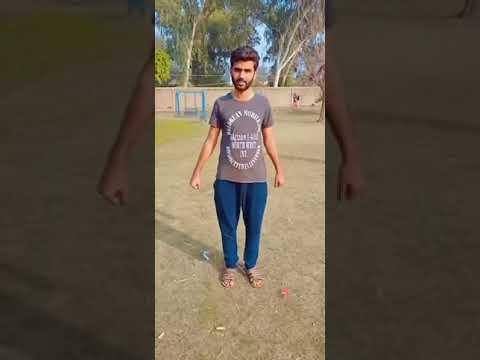

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('9Uu3yQKI0cE')


**Installation:**
Below code is to download and compile Openpose with this google Colab enviroment.


In [2]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo


Selecting previously unselected package libgflags2.2.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

**Detect Pose in Sample Video:**
In this step Poses will be detected from the recorded video.


In [3]:
YOUTUBE_ID = '9Uu3yQKI0cEg'

YouTubeVideo(YOUTUBE_ID)


Download the video and detect poses from the first 15 seconds

In [4]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 8 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 15 video.mp4
# detect poses on the these 8 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4


[youtube] 9Uu3yQKI0cE: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 585.68KiB in 00:08
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis

**Visualization:**

In [5]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4')


Now we will run openpose with our input file(input.mp4) to carry out the following outputs.
•	The body keypoints in JSON format.
•	The video of keypoints.


In [6]:
# delete files from previous runs of this script
!rm openpose.avi

# detect poses in these video frames using OpenPose
!cd openpose && ./build/examples/openpose/openpose.bin --video ../input.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi

# convert the video output result into MP4 so we can visualize it using the 'show_local_mp4_video' function we defined above
!ffmpeg -y -loglevel info -i openpose.avi output.mp4



Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...

Error:
VideoCapture (IP camera/video) could not be opened for path: '../input.mp4'. If it is a video path, is the path correct?

Coming from:
- /content/openpose/src/openpose/producer/videoCaptureReader.cpp:VideoCaptureReader():54
- /content/openpose/src/openpose/producer/videoCaptureReader.cpp:VideoCaptureReader():58
- /content/openpose/src/openpose/producer/producer.cpp:createProducer():475
- /content/openpose/include/openpose/wrapper/wrapperAuxiliary.hpp:configureThreadManager():1221
- /content/openpose/include/openpose/wrapper/wrapper.hpp:exec():424
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls 

To visualize the results.

In [7]:
show_local_mp4_video('output.mp4', width=960, height=640)

**View OpenPose JSON output:**
The output of OpenPose for each frame is saved in a JSON file. Let's print out one of these files to see its structure.

In [8]:
# Load JSON file
import json

with open('/content/openpose/output/video_000000000067_keypoints.json') as json_file:
    data = json.load(json_file)

print(json.dumps(data, indent=4))


{
    "version": 1.3,
    "people": [
        {
            "person_id": [
                -1
            ],
            "pose_keypoints_2d": [
                117.94,
                98.3401,
                0.92101,
                128.368,
                136.191,
                0.847902,
                98.2927,
                138.784,
                0.854954,
                89.2332,
                184.451,
                0.890739,
                82.6786,
                233.965,
                0.803798,
                159.66,
                132.298,
                0.813129,
                170.07,
                192.26,
                0.861389,
                151.891,
                245.807,
                0.873941,
                127.016,
                240.55,
                0.675515,
                106.172,
                240.53,
                0.655806,
                106.137,
                326.667,
                0.697566,
                104.877,
  

We name all indices using keywords

In [9]:
NOSE = 0
NECK = 1
RSHO = 2
RELB = 3
RWRI = 4
LSHO = 5
LELB = 6
LWRI = 7
MHIP = 8
RHIP = 9
RKNE = 10
RANK = 11
LHIP = 12
LKNE = 13
LANK = 14
REYE = 15
LEYE = 16
REAR = 17
LEAR = 18
LBTO = 19
LSTO = 20
LHEL = 21
RBTO = 22
RSTO = 23
RHEL = 24

print("DONE: Short keywords assigned")


DONE: Short keywords assigned


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**JSON files to time series keypoints:**
To run our analysis, we want to load data from all the JSON files into memory. In this case, we name that data array res. We will loop through all the files and use the functions from the numpy (np) package to store the subject's data as an array with 240 rows (one for each file/frame) and 75 columns. In our script, we determine the number of frames by counting the number of files in the directory.

In [11]:
import numpy as np
import pandas as pd

def convert_json2csv(json_directory):
    # determine the number of frames
    nframes = len(os.listdir(json_directory))
  
    # initialize res to be array of NaN
    res = np.zeros((nframes,75))
    res[:] = np.nan
    
    # read in JSON files
    for frame in range(0,nframes):
        test_image_json = '%svideo_%s_keypoints.json' %            (json_directory, str(frame).zfill(12))

        if not os.path.isfile(test_image_json):
            break
        with open(test_image_json) as data_file:  
            data = json.load(data_file)

        for person in data['people']:
            keypoints = person['pose_keypoints_2d']
            xcoords = [keypoints[i] for i in range(len(keypoints))
        if i % 3 == 0]
            counter = 0
            res[frame,:] = keypoints
            break

    return res

res = convert_json2csv("openpose/output/")
pd.DataFrame(res) # only for clean display



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,129.598,119.257,0.913416,130.937,162.238,0.939601,99.6820,162.247,0.886004,89.2898,214.438,0.915617,77.5134,257.533,0.909313,162.235,162.224,0.889035,172.651,214.471,0.904550,180.482,264.002,0.849065,127.024,265.283,0.722486,106.189,262.718,0.698527,99.7167,335.785,0.785223,98.2765,403.653,0.834143,147.886,265.368,0.720139,140.029,329.248,0.847024,130.935,374.940,0.839953,120.562,110.139,0.926586,137.469,110.156,0.873887,111.381,112.686,0.820050,150.460,114.015,0.844310,136.153,399.693,0.798490,141.432,393.222,0.787676,125.744,378.792,0.695702,98.3690,429.683,0.753205,89.1899,424.514,0.761670,97.0522,410.154,0.642422
1,129.598,119.257,0.913421,130.937,162.238,0.939599,99.6820,162.247,0.886002,89.2898,214.438,0.915615,77.5134,257.533,0.909313,162.235,162.224,0.889032,172.651,214.471,0.904556,180.482,264.002,0.849065,127.024,265.283,0.722485,106.189,262.718,0.698526,99.7167,335.785,0.785222,98.2765,403.653,0.834142,147.886,265.368,0.720139,140.029,329.249,0.847024,130.935,374.940,0.839953,120.562,110.139,0.926569,137.469,110.156,0.873885,111.381,112.686,0.820032,150.460,114.015,0.844298,136.152,399.693,0.798490,141.431,393.222,0.787676,125.744,378.792,0.695702,98.3690,429.683,0.753205,89.1899,424.514,0.761670,97.0521,410.154,0.642422
2,129.615,120.501,0.925883,130.945,162.283,0.939473,99.7135,162.283,0.875586,90.5079,214.473,0.906777,78.7206,257.554,0.902134,162.224,162.254,0.899582,171.461,214.496,0.895938,179.244,262.721,0.827007,127.056,265.283,0.725177,107.436,262.721,0.700176,100.9380,337.071,0.780619,98.2959,403.650,0.826341,147.922,265.363,0.726513,140.047,329.242,0.842745,130.954,373.603,0.841732,120.569,111.398,0.916925,137.482,111.421,0.861105,111.397,116.584,0.810737,150.452,116.608,0.844724,136.184,398.422,0.794124,141.465,393.178,0.783762,125.737,376.216,0.689771,98.3748,428.384,0.734349,89.2042,423.253,0.756922,98.2852,411.398,0.611849
3,129.601,119.183,0.908885,130.965,160.929,0.939193,100.9550,160.921,0.860159,90.5431,213.117,0.891172,78.7494,254.925,0.933068,161.003,160.940,0.887743,171.454,213.181,0.923524,177.936,257.526,0.841052,128.302,261.408,0.708141,107.457,257.537,0.718144,100.9450,330.599,0.785756,98.3412,401.004,0.845442,147.941,264.019,0.716936,140.057,326.665,0.816021,130.942,369.724,0.872890,120.568,110.075,0.941821,137.458,110.097,0.888746,111.405,111.427,0.784689,149.232,112.700,0.856229,136.190,393.230,0.761410,141.454,390.577,0.801534,124.453,370.981,0.735682,99.6560,423.175,0.785457,89.2606,421.845,0.766491,98.3322,404.924,0.596502
4,129.627,116.617,0.881783,130.961,159.627,0.911163,100.9450,159.609,0.838587,90.5272,211.809,0.864265,78.7387,254.857,0.920259,161.001,158.349,0.846836,171.459,211.865,0.891715,177.945,256.175,0.871377,128.339,257.513,0.722677,107.492,256.198,0.739727,100.9780,329.301,0.795329,98.3438,399.717,0.843037,149.209,260.122,0.709152,140.070,324.036,0.787141,130.958,369.650,0.861044,120.559,108.763,0.928567,137.457,108.766,0.893049,111.373,110.099,0.876319,149.235,110.070,0.900222,136.180,391.878,0.771751,141.468,389.243,0.754163,125.732,369.707,0.750916,99.6854,421.870,0.797913,90.5162,420.535,0.757391,98.3345,403.630,0.604573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,129.609,176.632,0.873725,129.668,205.334,0.930989,102.2560,209.221,0.805745,98.3440,265.272,0.881162,99.6383,316.164,0.877182,155.737,203.990,0.873456,164.858,254.902,0.886139,163.615,304.445,0.847394,130.978,284.900,0.801129,115.322,284.889,0.739094,114.0010,341.003,0.717061,112.6770,360.528,0.784572,149.226,284.913,0.768748,150.452,

**Remaining Work will be done after Simulation Defence.**